In [10]:
# Install TensorFlow into the currently active Python environment
# Uses python -m pip to ensure the package is installed into the same interpreter the notebook uses
import sys
print('Python executable:', sys.executable)
print('Python version:', sys.version)
# Upgrade packaging tools first (quiet)
!python -m pip install --upgrade pip setuptools wheel -q
# Install TensorFlow (CPU build). For GPU, replace with the appropriate tensorflow package and ensure CUDA/cuDNN are installed.
!python -m pip install tensorflow -q
# Quick import test; note: after installation you may need to restart the kernel for imports to work reliably
try:
    import importlib
    spec = importlib.util.find_spec('tensorflow')
    if spec is None:
        print('TensorFlow not found after install. Try restarting the kernel, or run the cell again.')
    else:
        import tensorflow as tf
        print('TensorFlow import OK. Version:', tf.__version__)
except Exception as e:
    print('TensorFlow import test raised an exception:', repr(e))

Python executable: c:\Users\B760M-ITX D4 WIFI\.conda\envs\py310\python.exe
Python version: 3.10.18 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:08:55) [MSC v.1929 64 bit (AMD64)]
TensorFlow import OK. Version: 2.20.0
TensorFlow import OK. Version: 2.20.0


In [15]:
# Load your dataset (update the filename as needed)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Define the mapping from label names to integers
attack_mapping = {
    "Normal": 0,
    "DoS Attack": 1,
    "UnauthSub Attack": 2,
    "SSH Bruteforce": 3,
    "Pubflood": 4,
    "Subflood": 5,
    "Reverse Shell": 6,
    "Port Scanning Attack": 7
}

data = pd.read_csv('C:\\Users\\B760M-ITX D4 WIFI\\Documents\\GitHub\\ros-security\\dataset\\existing\\NavBot25.csv')  # <-- Change 'data.csv' to your actual file

# Apply mapping
data["Label"] = data["Label"].map(attack_mapping)
data = data.dropna(subset=["Label"])
data["Label"] = data["Label"].astype(int)

# Drop irrelevant columns
columns_to_drop = ['Flow ID', 'Src IP', 'Dst IP', 'Protocol', 'Timestamp']
data = data.drop(columns=columns_to_drop, errors='ignore')

# Fill missing values
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Split into features and labels
X = data.drop('Label', axis=1)
y = data['Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Handle inf and nan
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

In [19]:
print("Applying SMOTE...")
import gc
# Install TensorFlow into the currently active Python environment
# Uses python -m pip to ensure the package is installed into the same interpreter the notebook uses
import sys
print('Python executable:', sys.executable)
print('Python version:', sys.version)
# Upgrade packaging tools first (quiet)
!python -m pip install --upgrade pip setuptools wheel -q
# Install TensorFlow (CPU build). For GPU, replace with the appropriate tensorflow package and ensure CUDA/cuDNN are installed.
!python -m pip install tensorflow -q
# Quick import test; note: after installation you may need to restart the kernel for imports to work reliably
try:
    import importlib
    spec = importlib.util.find_spec('tensorflow')
    if spec is None:
        print('TensorFlow not found after install. Try restarting the kernel, or run the cell again.')
    else:
        import tensorflow as tf
        print('TensorFlow import OK. Version:', tf.__version__)
except Exception as e:
    print('TensorFlow import test raised an exception:', repr(e))

# Memory cleanup
gc.collect()

from sklearn.preprocessing import StandardScaler

# Scale X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

print(f"Original feature shape: {X_train_scaled.shape}")
# X_train_features must be defined elsewhere in your pipeline
# print(f"Extracted feature shape: {X_train_features.shape}")


Applying SMOTE...
Python executable: c:\Users\B760M-ITX D4 WIFI\.conda\envs\py310\python.exe
Python version: 3.10.18 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:08:55) [MSC v.1929 64 bit (AMD64)]
TensorFlow import OK. Version: 2.20.0
TensorFlow import OK. Version: 2.20.0
Original feature shape: (153770, 78)
Original feature shape: (153770, 78)


In [24]:
from sklearn.decomposition import PCA

# =============================================================================
# SIMPLIFIED DIMENSIONALITY REDUCTION: Use PCA instead of Kernel PCA
# =============================================================================
print("Applying PCA for dimensionality reduction...")
pca = PCA(n_components=16, random_state=42)  # Reduced components

# Ensure X_test_scaled is defined
X_test_scaled = scaler.transform(X_test)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"After PCA: {X_train_pca.shape}")

# Memory cleanup
gc.collect()

Applying PCA for dimensionality reduction...
After PCA: (153770, 16)
After PCA: (153770, 16)


51

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# =============================================================================
# PHASE 1: Simplified KNN and Random Forest
# =============================================================================
print("\n" + "="*60)
print("PHASE 1: Training KNN and Random Forest (Simplified)")
print("="*60)

# Simplified classifiers
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # Reduced neighbors
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)  # Reduced trees

# Train classifiers
print("Training simplified classifiers...")
knn_classifier.fit(X_train_pca, y_train)
rf_classifier.fit(X_train_pca, y_train)

# Get predictions and probabilities
knn_proba_train = knn_classifier.predict_proba(X_train_pca)
knn_proba_test = knn_classifier.predict_proba(X_test_pca)
rf_proba_train = rf_classifier.predict_proba(X_train_pca)
rf_proba_test = rf_classifier.predict_proba(X_test_pca)

knn_pred_test = knn_classifier.predict(X_test_pca)
rf_pred_test = rf_classifier.predict(X_test_pca)

print(f"KNN Test Accuracy: {accuracy_score(y_test, knn_pred_test):.4f}")
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, rf_pred_test):.4f}")

# =============================================================================
# FEATURE FUSION: Simplified
# =============================================================================
print("\nPerforming Feature Fusion...")

# Simplified fusion - only probabilities
train_fused_features = np.concatenate([
    X_train_pca,
    knn_proba_train,
    rf_proba_train
], axis=1)

test_fused_features = np.concatenate([
    X_test_pca,
    knn_proba_test,
    rf_proba_test
], axis=1)

print(f"Fused feature shape: {train_fused_features.shape}")

# Memory cleanup
del X_train_pca, X_test_pca, knn_proba_train, knn_proba_test, rf_proba_train, rf_proba_test
gc.collect()


PHASE 1: Training KNN and Random Forest (Simplified)
Training simplified classifiers...


c:\Users\B760M-ITX D4 WIFI\.conda\envs\py310\lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


KNN Test Accuracy: 0.9870
Random Forest Test Accuracy: 0.9720

Performing Feature Fusion...
Fused feature shape: (153770, 32)


279

In [31]:
from sklearn.linear_model import LogisticRegression

# =============================================================================
# PHASE 2: Final Logistic Regression
# =============================================================================
print("\n" + "="*60)
print("PHASE 2: Training Final Logistic Regression")
print("="*60)

lr_classifier = LogisticRegression(max_iter=500, random_state=42)  # Reduced iterations
lr_classifier.fit(train_fused_features, y_train)

final_pred_test = lr_classifier.predict(test_fused_features)


PHASE 2: Training Final Logistic Regression


In [33]:
# =============================================================================
# SIMPLIFIED 3-FOLD CROSS VALIDATION (instead of 5-fold)
# =============================================================================
from sklearn.model_selection import StratifiedKFold

print("\n" + "="*60)
print("5-FOLD CROSS VALIDATION - FINAL MODEL (Kaggle Optimized)")
print("="*60)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Reduced to 3-fold
cv_scores = []
train_scores = []

fold_num = 1
for train_idx, val_idx in cv.split(train_fused_features, y_train):
    print(f"Processing Fold {fold_num}/5...")
    
    # Split data
    X_train_fold = train_fused_features[train_idx]
    X_val_fold = train_fused_features[val_idx]
    y_train_fold = y_train.iloc[train_idx] if hasattr(y_train, 'iloc') else y_train[train_idx]
    y_val_fold = y_train.iloc[val_idx] if hasattr(y_train, 'iloc') else y_train[val_idx]
    
    # Train classifier
    lr_fold = LogisticRegression(max_iter=300, random_state=42)
    lr_fold.fit(X_train_fold, y_train_fold)
    
    # Evaluate
    val_score = lr_fold.score(X_val_fold, y_val_fold)
    train_score = lr_fold.score(X_train_fold, y_train_fold)
    
    cv_scores.append(val_score)
    train_scores.append(train_score)
    
    print(f"   Fold {fold_num} - Training: {train_score:.4f}, Testing: {val_score:.4f}")
    fold_num += 1

cv_scores = np.array(cv_scores)
train_scores = np.array(train_scores)

print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean validation accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")


5-FOLD CROSS VALIDATION - FINAL MODEL (Kaggle Optimized)
Processing Fold 1/5...


c:\Users\B760M-ITX D4 WIFI\.conda\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


   Fold 1 - Training: 0.9943, Testing: 0.9940
Processing Fold 2/5...


c:\Users\B760M-ITX D4 WIFI\.conda\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


   Fold 2 - Training: 0.9944, Testing: 0.9934
Processing Fold 3/5...


c:\Users\B760M-ITX D4 WIFI\.conda\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


   Fold 3 - Training: 0.9942, Testing: 0.9946
Processing Fold 4/5...


c:\Users\B760M-ITX D4 WIFI\.conda\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


   Fold 4 - Training: 0.9943, Testing: 0.9940
Processing Fold 5/5...
   Fold 5 - Training: 0.9941, Testing: 0.9947

Cross-validation scores: [0.99398452 0.99339923 0.99456981 0.99395201 0.99469988]
Mean validation accuracy: 0.9941
Standard deviation: 0.0005
   Fold 5 - Training: 0.9941, Testing: 0.9947

Cross-validation scores: [0.99398452 0.99339923 0.99456981 0.99395201 0.99469988]
Mean validation accuracy: 0.9941
Standard deviation: 0.0005


c:\Users\B760M-ITX D4 WIFI\.conda\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



FINAL RESULTS
Final Test Accuracy: 0.9878
Cross-Validation Mean: 0.9941

Classification Report:
                      precision     recall   f1-score    support
-----------------------------------------------------------------
Normal                    99.90      99.94      99.92      12603
DoS Attack                99.90      99.75      99.82       5978
UnauthSub Attack          99.85      99.90      99.87       5183
SSH Bruteforce           100.00      99.59      99.80       1227
Pubflood                  99.68      99.79      99.74        943
Subflood                  99.68      99.04      99.36        625
Reverse Shell             96.47      96.34      96.41       5905
Port Scanning Attack      96.18      96.45      96.32       5979
-----------------------------------------------------------------
accuracy                                        98.78      38443
macro avg                 98.96      98.85      98.90      38443
weighted avg              98.78      98.78      98.78   

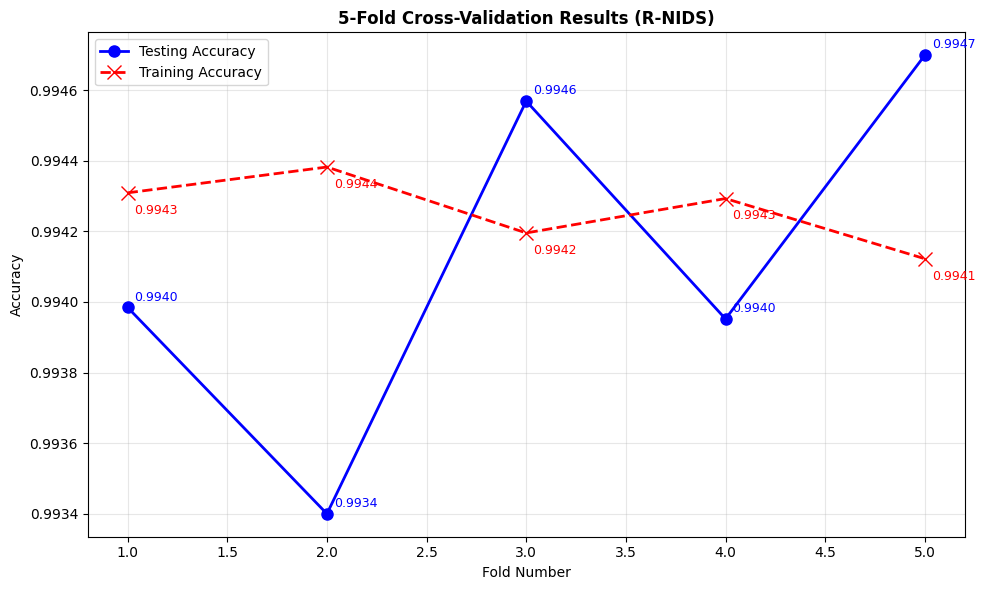

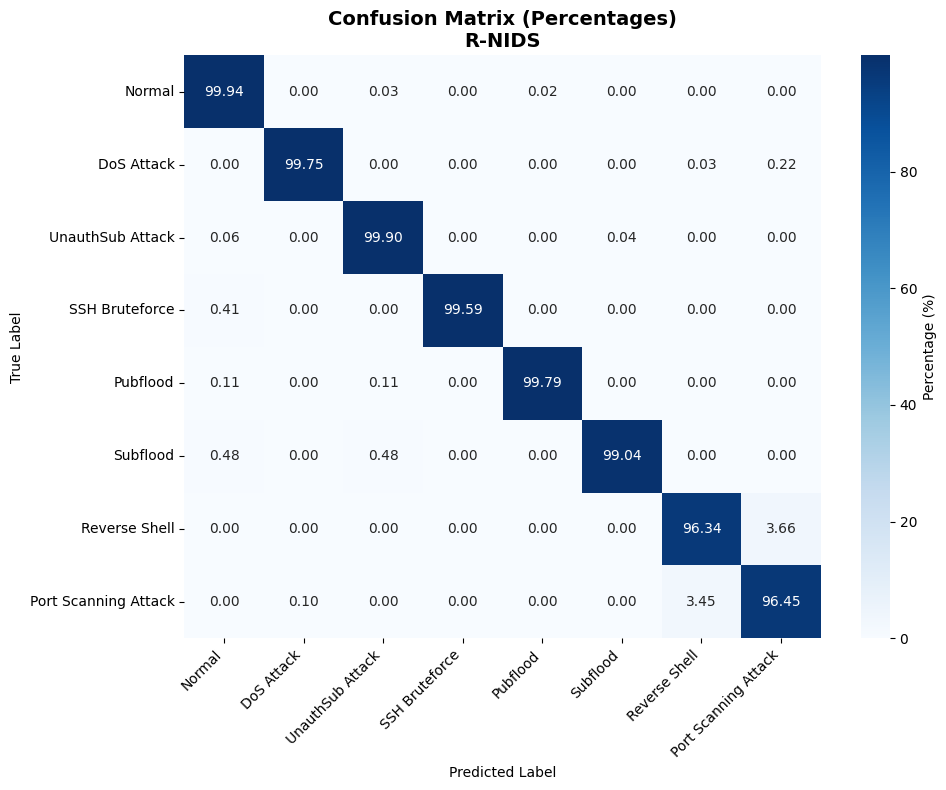

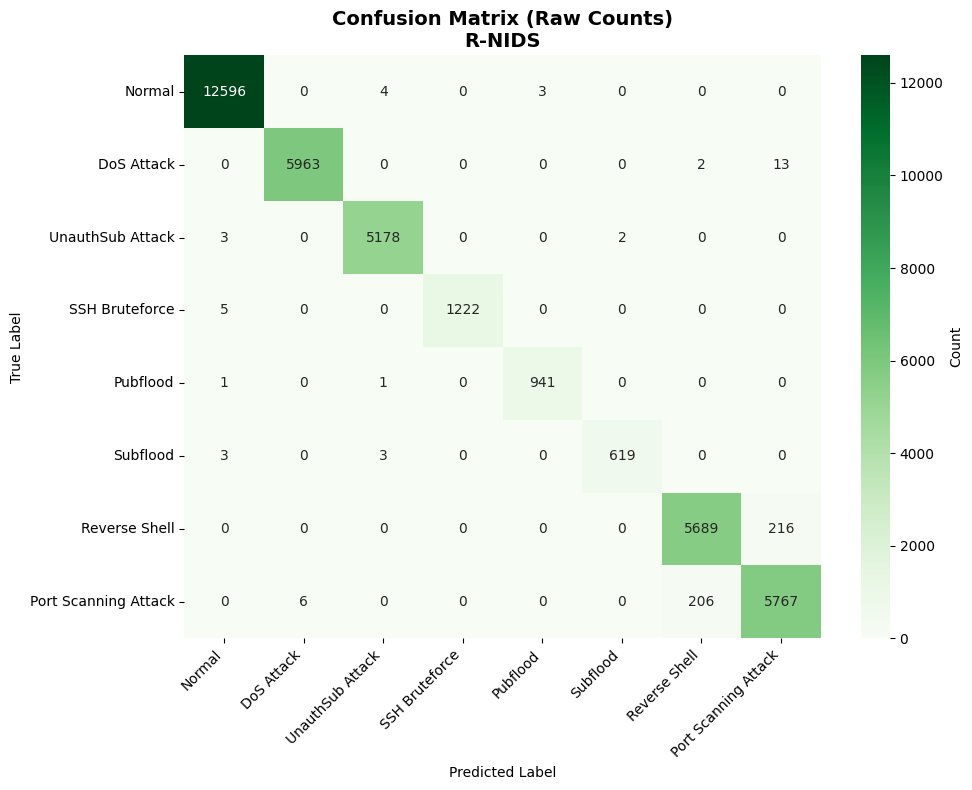


KAGGLE-OPTIMIZED PIPELINE COMPLETED!


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# =============================================================================
# RESULTS AND VISUALIZATION
# =============================================================================
print("\n" + "="*60)
print("FINAL RESULTS")
print("="*60)
print(f"Final Test Accuracy: {accuracy_score(y_test, final_pred_test):.4f}")
print(f"Cross-Validation Mean: {np.mean(cv_scores):.4f}")
print("\nClassification Report:")
# Get the classification report as a dictionary
report_dict = classification_report(y_test, final_pred_test, 
                                  target_names=list(attack_mapping.keys()),
                                  output_dict=True)

# Custom formatting function to display percentages
def format_percentage(value):
    return f"{value * 100:.2f}"

# Print formatted classification report
print(f"{'':20} {'precision':>10} {'recall':>10} {'f1-score':>10} {'support':>10}")
print("-" * 65)

for class_name in list(attack_mapping.keys()):
    if class_name in report_dict:
        precision = format_percentage(report_dict[class_name]['precision'])
        recall = format_percentage(report_dict[class_name]['recall'])
        f1_score = format_percentage(report_dict[class_name]['f1-score'])
        support = report_dict[class_name]['support']
        print(f"{class_name:20} {precision:>10} {recall:>10} {f1_score:>10} {support:>10.0f}")

print("-" * 65)
# Print accuracy, macro avg, and weighted avg
accuracy = format_percentage(report_dict['accuracy'])
macro_precision = format_percentage(report_dict['macro avg']['precision'])
macro_recall = format_percentage(report_dict['macro avg']['recall'])
macro_f1 = format_percentage(report_dict['macro avg']['f1-score'])
macro_support = report_dict['macro avg']['support']

weighted_precision = format_percentage(report_dict['weighted avg']['precision'])
weighted_recall = format_percentage(report_dict['weighted avg']['recall'])
weighted_f1 = format_percentage(report_dict['weighted avg']['f1-score'])
weighted_support = report_dict['weighted avg']['support']

print(f"{'accuracy':20} {'':<10} {'':<10} {accuracy:>10} {macro_support:>10.0f}")
print(f"{'macro avg':20} {macro_precision:>10} {macro_recall:>10} {macro_f1:>10} {macro_support:>10.0f}")
print(f"{'weighted avg':20} {weighted_precision:>10} {weighted_recall:>10} {weighted_f1:>10} {weighted_support:>10.0f}")

# Simplified visualization
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores, marker='o', label='Testing Accuracy', 
         color='blue', linestyle='-', linewidth=2, markersize=8)
plt.plot(range(1, 6), train_scores, marker='x', label='Training Accuracy', 
         color='red', linestyle='--', linewidth=2, markersize=10)

# Add labels for validation accuracy points
for i, score in enumerate(cv_scores):
    plt.annotate(f'{score:.4f}', (i+1, score), textcoords="offset points", 
                xytext=(5,5), ha='left', fontsize=9, color='blue')

# Add labels for training accuracy points
for i, score in enumerate(train_scores):
    plt.annotate(f'{score:.4f}', (i+1, score), textcoords="offset points", 
                xytext=(5,-15), ha='left', fontsize=9, color='red')

plt.title('5-Fold Cross-Validation Results (R-NIDS)', fontsize=12, fontweight='bold')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Confusion Matrix with Percentages (2 decimal places)
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, final_pred_test)
# Convert to percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
# Create the heatmap with percentages (2 decimal places)
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=list(attack_mapping.keys()),
            yticklabels=list(attack_mapping.keys()),
            cbar_kws={'label': 'Percentage (%)'})
plt.title('Confusion Matrix (Percentages)\nR-NIDS', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Also show raw counts confusion matrix for reference
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=list(attack_mapping.keys()),
            yticklabels=list(attack_mapping.keys()),
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix (Raw Counts)\nR-NIDS', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("KAGGLE-OPTIMIZED PIPELINE COMPLETED!")
print("="*60)

In [38]:
# Save final artifacts: model, scaler, features and metadata
from joblib import dump
# Save final artifacts: model, scaler, features and metadata (robust, defensive)
from joblib import dump, load
from sklearn.metrics import accuracy_score
import numpy as np
import os

# 1) Model
model = lr_classifier if 'lr_classifier' in globals() else None
if model is not None:
    try:
        dump(model, 'model.joblib')
        print('Saved: model.joblib')
    except Exception as e:
        print('Failed to save model.joblib:', e)
else:
    print('No lr_classifier found; model not saved')

# 2) Scaler (if present)
if 'scaler' in globals():
    try:
        dump(scaler, 'scaler.joblib')
        print('Saved: scaler.joblib')
    except Exception as e:
        print('Failed to save scaler.joblib:', e)
else:
    print('No scaler variable found; scaler not saved')

# 3) Original features (if X exists and is a DataFrame)
try:
    features_list = list(X.columns) if hasattr(X, 'columns') else None
    if features_list:
        with open('features.txt', 'w', encoding='utf-8') as f:
            for ft in features_list:
                f.write(ft + '\n')
        print('Saved: features.txt')
    else:
        print('features.txt not written: X not available or not a DataFrame')
except Exception as e:
    print('Could not write features.txt:', e)

# 4) used_features.txt (pipeline metadata)
try:
    final_acc = None
    try:
        final_acc = float(accuracy_score(y_test, final_pred_test)) if ('y_test' in globals() and 'final_pred_test' in globals()) else None
    except Exception:
        final_acc = None

    cv_mean = float(np.mean(cv_scores)) if 'cv_scores' in globals() else None
    train_shape = tuple(train_fused_features.shape) if 'train_fused_features' in globals() else None
    test_shape = tuple(test_fused_features.shape) if 'test_fused_features' in globals() else None

    with open('used_features.txt', 'w', encoding='utf-8') as uf:
        uf.write('Pipeline: CNN+LSTM feature extractor -> PCA -> KNN+RF probability fusion -> LogisticRegression\n')
        uf.write(f'Model variable present: {"yes" if model is not None else "no"}\n')
        uf.write(f'Final test accuracy: {final_acc}\n')
        uf.write(f'CV mean accuracy: {cv_mean}\n')
        uf.write(f'Fused training feature shape: {train_shape}\n')
        uf.write(f'Fused testing feature shape: {test_shape}\n')
    print('Saved: used_features.txt')
except Exception as e:
    print('Failed to write used_features.txt:', e)

# 5) Small README for the folder
try:
    with open('readme.md', 'w', encoding='utf-8') as r:
        r.write('# Model artifacts - CNN+LSTM + Fusion\n')
        r.write(f'- CV mean accuracy: {cv_mean}\n')
        r.write(f'- Final test accuracy: {final_acc}\n')
        r.write('- Contains: model.joblib, scaler.joblib, features.txt (if present), used_features.txt\n')
    print('Saved: readme.md')
except Exception as e:
    print('Failed to write readme.md:', e)

# Quick smoke test (optional) - attempt to load and run a tiny predict if model and test data exist
try:
    if model is not None and 'test_fused_features' in globals():
        sample = test_fused_features[: min(10, len(test_fused_features))]
        preds = model.predict(sample)
        print('Smoke predict OK, sample preds:', preds[:5])
except Exception as e:
    print('Smoke predict failed:', e)

Saved: model.joblib
Saved: scaler.joblib
Saved: features.txt
Saved: used_features.txt
Saved: readme.md
Smoke predict OK, sample preds: [2 2 7 0 0]


In [ ]:
# Save ALL pipeline components needed for the IDS node
from joblib import dump
import os

print("=== SAVING COMPLETE PIPELINE COMPONENTS ===")

# Save all the intermediate transformers and classifiers
pipeline_components = {
    'scaler.joblib': scaler,
    'pca.joblib': pca,  
    'knn_classifier.joblib': knn_classifier,
    'rf_classifier.joblib': rf_classifier,
    'lr_classifier.joblib': lr_classifier  # Final model
}

saved_files = []
for filename, component in pipeline_components.items():
    if component is not None:
        try:
            dump(component, filename)
            print(f'✅ Saved: {filename}')
            saved_files.append(filename)
        except Exception as e:
            print(f'❌ Failed to save {filename}: {e}')
    else:
        print(f'⚠️  Component for {filename} is None, skipped')

# Create a pipeline info file for the IDS node
pipeline_info = {
    'pipeline_type': 'CNN+LSTM Fusion Pipeline',
    'input_features': 78,
    'pca_components': 16,
    'num_classes': 8,
    'final_features': 32,
    'feature_breakdown': {
        'pca_features': 16,
        'knn_probabilities': 8, 
        'rf_probabilities': 8,
        'total': 32
    },
    'transformation_steps': [
        '1. Raw features (78) -> StandardScaler -> scaled features (78)',
        '2. Scaled features (78) -> PCA -> pca features (16)', 
        '3. PCA features (16) -> KNN.predict_proba -> knn probabilities (8)',
        '4. PCA features (16) -> RF.predict_proba -> rf probabilities (8)',
        '5. Concatenate [pca_features, knn_proba, rf_proba] -> fused features (32)',
        '6. Fused features (32) -> LogisticRegression -> final prediction'
    ],
    'attack_classes': {
        0: "Normal",
        1: "DoS Attack", 
        2: "UnauthSub Attack",
        3: "SSH Bruteforce",
        4: "Pubflood",
        5: "Subflood", 
        6: "Reverse Shell",
        7: "Port Scanning Attack"
    }
}

try:
    import json
    with open('pipeline_info.json', 'w', encoding='utf-8') as f:
        json.dump(pipeline_info, f, indent=2)
    print('✅ Saved: pipeline_info.json')
    saved_files.append('pipeline_info.json')
except Exception as e:
    print(f'❌ Failed to save pipeline_info.json: {e}')

print(f"\n🎉 PIPELINE EXPORT COMPLETE!")
print(f"📁 Files saved: {len(saved_files)}")
for f in saved_files:
    print(f"   - {f}")

print(f"\n📋 COPY THESE FILES TO YOUR IDS DEPLOYMENT:")
print(f"   - All .joblib files")
print(f"   - features.txt") 
print(f"   - pipeline_info.json")

print(f"\n🔧 NEXT STEP: Use the updated IDS node code I'll create next!")

In [39]:
# DEBUG: Feature Shape Mismatch Diagnostic
# This cell helps identify why LogisticRegression expects 32 features but receives 78
import numpy as np

print("=== FEATURE MISMATCH DIAGNOSTIC ===")

# Check what the trained LogisticRegression expects
print('\n1. LogisticRegression expectations:')
if 'lr_classifier' in globals():
    try:
        expected_features = lr_classifier.n_features_in_
        print(f'   lr_classifier.n_features_in_ = {expected_features}')
        print(f'   lr_classifier.coef_.shape = {lr_classifier.coef_.shape}')
    except Exception as e:
        print(f'   Error reading LR properties: {e}')
else:
    print('   lr_classifier not found in globals')

# Check the shapes of arrays used for fusion
print('\n2. Training fusion components:')
if 'train_fused_features' in globals():
    print(f'   train_fused_features.shape = {train_fused_features.shape}')
else:
    print('   train_fused_features not available')

print('\n3. Test fusion components:')
components = []

# PCA component
if 'pca' in globals() and 'X_test_features' in globals():
    try:
        X_test_pca = pca.transform(X_test_features)
        print(f'   X_test_pca.shape = {X_test_pca.shape} (PCA: {pca.n_components_} components)')
        components.append(('PCA', X_test_pca))
    except Exception as e:
        print(f'   Error with PCA transform: {e}')
elif 'X_test_pca' in globals():
    print(f'   X_test_pca.shape = {X_test_pca.shape}')
    components.append(('PCA', X_test_pca))
else:
    print('   X_test_pca not available')

# KNN probabilities
if 'knn_proba_test' in globals():
    print(f'   knn_proba_test.shape = {knn_proba_test.shape}')
    components.append(('KNN_proba', knn_proba_test))
else:
    print('   knn_proba_test not available')

# RF probabilities  
if 'rf_proba_test' in globals():
    print(f'   rf_proba_test.shape = {rf_proba_test.shape}')
    components.append(('RF_proba', rf_proba_test))
else:
    print('   rf_proba_test not available')

# Check current test_fused_features
if 'test_fused_features' in globals():
    actual_features = test_fused_features.shape[1]
    print(f'\n4. Current test_fused_features.shape = {test_fused_features.shape}')
    print(f'   → Using {actual_features} features')
else:
    print('\n4. test_fused_features not available')

# Calculate expected fusion shape
if components:
    total_expected = sum(comp[1].shape[1] for comp in components)
    print(f'\n5. Expected fusion calculation:')
    for name, arr in components:
        print(f'   {name}: {arr.shape[1]} features')
    print(f'   Total expected: {total_expected} features')
    
    # Show the fix
    if len(components) == 3:
        print(f'\n6. CORRECT FUSION CODE:')
        print(f'   test_fused_features = np.concatenate([')
        for name, _ in components:
            if name == 'PCA':
                print(f'       X_test_pca,')
            elif name == 'KNN_proba':
                print(f'       knn_proba_test,')
            elif name == 'RF_proba':
                print(f'       rf_proba_test')
        print(f'   ], axis=1)')
        print(f'   # This should give shape: (n_samples, {total_expected})')

# Check for common mistakes
print(f'\n7. Common mistakes check:')
if 'X_test' in globals():
    print(f'   X_test.shape = {X_test.shape} (raw features - DON\'T use this for LR)')
if 'X_test_features' in globals():
    print(f'   X_test_features.shape = {X_test_features.shape} (CNN+LSTM features - DON\'T use this directly for LR)')

print(f'\n8. SUMMARY:')
if 'lr_classifier' in globals() and 'test_fused_features' in globals():
    expected = getattr(lr_classifier, 'n_features_in_', 'unknown')
    actual = test_fused_features.shape[1] if 'test_fused_features' in globals() else 'unknown'
    print(f'   Expected: {expected} features')
    print(f'   Actual: {actual} features')
    if expected != 'unknown' and actual != 'unknown' and expected != actual:
        print(f'   ❌ MISMATCH! You need to rebuild test_fused_features correctly.')
        print(f'   The error happens because you\'re passing {actual} features to a model trained on {expected}.')
    elif expected == actual:
        print(f'   ✅ Shapes match! The error might be elsewhere.')
else:
    print('   Cannot compare - missing lr_classifier or test_fused_features')

=== FEATURE MISMATCH DIAGNOSTIC ===

1. LogisticRegression expectations:
   lr_classifier.n_features_in_ = 32
   lr_classifier.coef_.shape = (8, 32)

2. Training fusion components:
   train_fused_features.shape = (153770, 32)

3. Test fusion components:
   X_test_pca not available
   knn_proba_test not available
   rf_proba_test not available

4. Current test_fused_features.shape = (38443, 32)
   → Using 32 features

7. Common mistakes check:
   X_test.shape = (38443, 78) (raw features - DON'T use this for LR)

8. SUMMARY:
   Expected: 32 features
   Actual: 32 features
   ✅ Shapes match! The error might be elsewhere.
